In [1]:
# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
books = pd.read_csv(r"C:\Users\Admin\Desktop\book.csv",sep=',', encoding='latin-1')
books.head()

,user_Id,Book_title,Book_author,Publisher,ratings
0,1,Classical Mythology,Mark P. O. Morford,Oxford University Press,0
1,2,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,5
2,3,Decision in Normandy,Carlo D'Este,HarperPerennial,0
3,4,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,3
4,5,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,6


In [5]:
books.shape

(5000, 5)

In [6]:
books.columns

Index(['user_Id', 'Book_title', 'Book_author', 'Publisher', 'ratings'], dtype='object')

In [7]:
books.isna().sum()

user_Id        0
Book_title     0
Book_author    0
Publisher      0
ratings        0
dtype: int64

In [8]:
# There is no NA values in the dataset

In [9]:
# Checking the unique numbers for each column

In [10]:
print(books.nunique())

user_Id        5000
Book_title     4839
Book_author    3213
Publisher      1156
ratings          11
dtype: int64


In [11]:
# Value counts for each rating

In [12]:
value_counts = books.ratings.value_counts()
value_counts

0     3078
8      479
7      365
10     305
9      295
5      194
6      179
4       54
3       32
2       15
1        4
Name: ratings, dtype: int64

In [13]:
# Barplot of value counts of each rating

Text(0, 0.5, 'Counts')

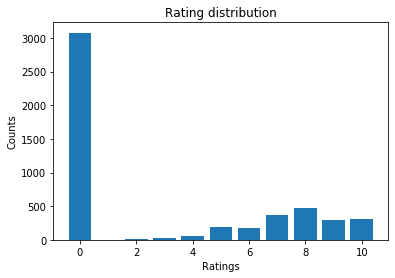

In [14]:
plt.bar(
    x = value_counts.index,
    height=value_counts);
plt.title("Rating distribution")
plt.xlabel("Ratings");
plt.ylabel("Counts")

In [15]:
# The non rating value i.e. 0 has highest counts, ratings 8 and 7 has got the next highest counts

In [16]:
books_rating = books

### Recommendation based on rating counts

In [17]:
books_ratingCount = (books_rating.
                    groupby(by=['Book_title'])['ratings'].
                    count().
                    reset_index().
                    rename(columns={'ratings':'totalRatingCount'})
                    [['Book_title','totalRatingCount']]
                    )
books_ratingCount.head()

,Book_title,totalRatingCount
0,A Mountain Journal: A Mountain Journal;Alan W...,1
1,Ashley's);Ellen Reymes;1997;Scholastic;http:/...,1
2,Assoc Inc;http://images.amazon.com/images/P/1...,1
3,Assoc Inc;http://images.amazon.com/images/P/1...,1
4,Busby;http://images.amazon.com/images/P/07490...,1


In [18]:
books_ratingCount.shape

(4839, 2)

In [19]:
# Checking the books with highest total rating counts

In [20]:
books_ratingCount.sort_values("totalRatingCount", ascending =False).head()

,Book_title,totalRatingCount
1233,Ender's Game (Ender Wiggins Saga (Paperback)),4
3388,"The Amber Spyglass (His Dark Materials, Book 3)",4
3759,"The Golden Compass (His Dark Materials, Book 1)",3
4253,"The Subtle Knife (His Dark Materials, Book 2)",3
4277,The Testament,3


In [21]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
books_ratingCount.describe()

,totalRatingCount
count,4839.000
mean,1.033
std,0.193
min,1.000
25%,1.000
50%,1.000
75%,1.000
max,4.000


In [22]:
# Only few books have more than one rating and remaining all the books have only one rating

In [23]:
# Merging the total rating counts with books rating data frame

In [24]:
rating_with_totalRatingCount = books_ratingCount.merge(books_rating, left_on ='Book_title',right_on='Book_title',how='left')
rating_with_totalRatingCount.head()

,Book_title,totalRatingCount,user_Id,Book_author,Publisher,ratings
0,A Mountain Journal: A Mountain Journal;Alan W...,1,4966,Witsch;http://images.amazon.com/images/P/3462...,Co;http://images.amazon.com/images/P/03162852...,0
1,Ashley's);Ellen Reymes;1997;Scholastic;http:/...,1,4917,Ashley Olsen;2004;HarperEntertainment;http://...,Giroux;http://images.amazon.com/images/P/0374...,0
2,Assoc Inc;http://images.amazon.com/images/P/1...,1,4955,Assoc Inc;http://images.amazon.com/images/P/1...,"Janes Editores, S.A.;http://images.amazon.com...",0
3,Assoc Inc;http://images.amazon.com/images/P/1...,1,4969,Oetinger &amp,Giroux;http://images.amazon.com/images/P/0374...,0
4,Busby;http://images.amazon.com/images/P/07490...,1,4906,Sons;http://images.amazon.com/images/P/002862...,Schuster;http://images.amazon.com/images/P/06...,0


In [25]:
rating_with_totalRatingCount.shape

(5000, 6)

In [26]:
# Considering only the books which have rating of minimum 5 

In [27]:
popularity_threshold = 5
rating_popular_book = rating_with_totalRatingCount.query('ratings >= @popularity_threshold')
rating_popular_book.head()

,Book_title,totalRatingCount,user_Id,Book_author,Publisher,ratings
7,Co.;http://images.amazon.com/images/P/3426621...,1,4954,Dunlap;http://images.amazon.com/images/P/0448...,Boon Ltd;http://images.amazon.com/images/P/02...,7
13,Company;http://images.amazon.com/images/P/039...,1,4937,Giroux;http://images.amazon.com/images/P/0571...,Dist;http://images.amazon.com/images/P/091267...,6
31,Graf Publishers;http://images.amazon.com/imag...,1,4944,Witsch GmbH &amp,JanÃ©s literaria);Camilo JosÃ© Cela;1986;Plaz...,6
52,Schuster));Sandra Boynton;1984;Little Simon;h...,1,4918,Company;http://images.amazon.com/images/P/039...,Graf Publishers;http://images.amazon.com/imag...,10
76,"100 Great Fantasy Short, Short Stories",1,3657,Isaac Asimov,Harper Mass Market Paperbacks (Mm),9


In [28]:
rating_popular_book.shape

(1817, 6)

In [29]:
# presenting the dataframe in pivot table form

In [30]:
book_features_df = rating_popular_book.pivot_table(index='Book_title',columns='user_Id',values='ratings').fillna(0)

In [31]:
# Converting the dataframe into rating matrix

In [32]:
from scipy.sparse import csr_matrix
book_features_df_matrix = csr_matrix(book_features_df)

### Using the KNN for collbarative filtering 

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
model_knn = NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
book_features_df.shape

(1793, 1817)

In [36]:
# Randomly selecting any book from the dataframe

In [37]:
query_index = np.random.choice(book_features_df.shape[0])
query_index

325

In [38]:
# Defining the distances and indices for the KNN model

In [39]:
distances, indices = model_knn.kneighbors(book_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)

In [40]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendation for {0}:\n".format(book_features_df.index[query_index]))
    else:
        print('{0}:{1},with distance of {2}'.format(i, book_features_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for Daughter of Fortune: A Novel:

1:Strange Memories The Nancy Drew Files 122 (Nancy Drew Files (Paperback)),with distance of 1.0
2:Stranger in a Strange Land,with distance of 1.0
3:Strange Fits of Passion: A Novel,with distance of 1.0
4:Strangers,with distance of 1.0


In [ ]:
# The above 4 books are good recommendations for the randomly selected book.